# Projeto Python IA: Inteligência Artificial e Previsões

### Case: Sobreviventes do Titanic

Esta é a lendária competição Titanic ML – o melhor e primeiro desafio para você mergulhar nas competições de ML e se familiarizar com o funcionamento da plataforma Kaggle.

A competição é simples: use o aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.

Neste desafio, foi construido um modelo preditivo que responda à pergunta: “que tipos de pessoas têm maior probabilidade de sobreviver?” usando dados de passageiros (ou seja, nome, idade, sexo, classe socioeconômica, etc.).

In [1]:
#importando as bibliotecas que serão usadas
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
#dados para treino da IA
treino = pd.read_csv("train.csv")

#dados os quais preveremos se seus passageiros sobreviveram ou não
teste = pd.read_csv("test.csv")

#observar os dados para treino
display(treino)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###Limpeza dos dados

In [4]:
#informações de cada coluna dos dados de treino
display(treino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

As colunas 'Cabin', 'Embarked', 'Ticket' e 'Name' não carregam informações relevantes para treinar a IA, já que são apenas "identificações" de cada passageiro, portanto serão removidas.

Percebe-se, também, que há linhas com valor nulo, que também serão removidas.

(A coluna 'PassengerId' não foi removida pois ela será utilizada para identificar cada passageiro ao final).

In [5]:
treino_tratado=treino.drop(['Cabin','Embarked','Ticket','Name'],axis=1)
teste_tratado=teste.drop(['Cabin','Embarked','Ticket','Name'],axis=1)

In [6]:
#removendo as linhas com valor NaN
treino_tratado=treino_tratado.dropna()
teste_tratado=teste_tratado.dropna()

In [7]:
#vamos verificar se não há colunas com valor NaN
treino_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 50.2+ KB


In [8]:
#observar o formato dos dados de treino e de teste
print(treino_tratado.shape)
print(teste_tratado.shape)

(714, 8)
(331, 7)


Percebe-se que a coluna 'Age' não é um número. Para codifica-la como número, vamos usar a função "LabelEncoder()".

In [15]:
codificador = LabelEncoder()

In [16]:
treino_tratado["Sex"] = codificador.fit_transform(treino_tratado["Sex"])

teste_tratado["Sex"] = codificador.fit_transform(teste_tratado["Sex"])

In [17]:
treino_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Sex          714 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        714 non-null    int64  
 6   Parch        714 non-null    int64  
 7   Fare         714 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 50.2 KB


Agora todas as colunas são compostas por números.

###Análise

In [18]:
#algumas estatísticas dos dados de treino
treino_tratado.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,0.634454,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,1.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


Aparentemente não há nenhum problema nos dados até aqui.

Vamos ver a correlção entre cada coluna dos dados:

<Axes: >

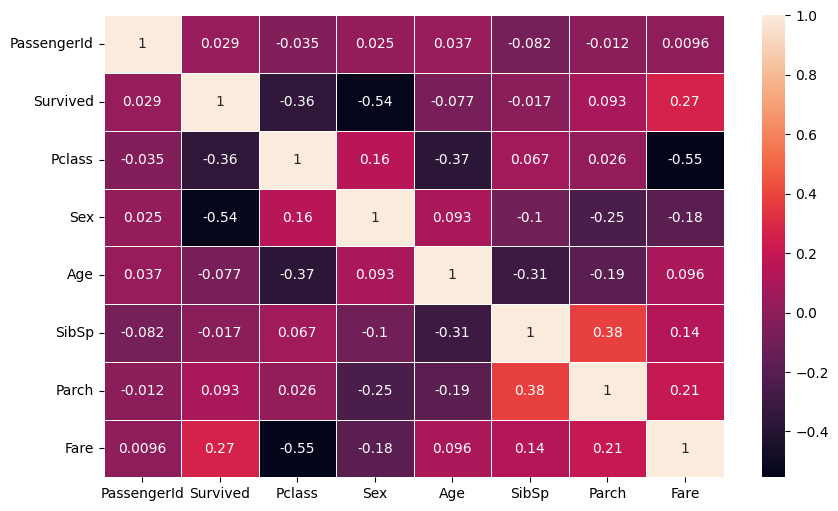

In [19]:
plt.figure(figsize = (10,6))
sns.heatmap(data = treino_tratado.corr(), annot = True, linewidth = 0.5)

O dado mais importante para esse projeto é o que está presente na coluna 'Survived'. Em relação à essa coluna, percebe-se que é há uma correlação razoável com a coluna 'Sex', fraca com as colunas 'Fare' e 'PClass' e quase nula com as demais colunas.

A coluna 'Age' possui uma correlação quae nula com a coluna 'Survived', porém possuia algumas linhas nulas. Dado que essa coluna não é importante para a classificação de sobrevivência, vamos remove-la para que não seja necessário remover as linhas cujo o valor da coluna 'Age é nulo.

In [21]:
treino_tratado=treino.drop(['Cabin','Embarked','Ticket','Name','Age'],axis=1)
teste_tratado=teste.drop(['Cabin','Embarked','Ticket','Name','Age'],axis=1)
treino_tratado=treino_tratado.dropna()
teste_tratado=teste_tratado.dropna()

treino_tratado["Sex"] = codificador.fit_transform(treino_tratado["Sex"])
teste_tratado["Sex"] = codificador.fit_transform(teste_tratado["Sex"])

print(treino_tratado.shape)
print(teste_tratado.shape)

(891, 7)
(417, 6)


Agora, ao invés de 714 linhas nos dados de treino e 331 nos dados de teste, são 891 e 417 linhas. Isso significa que "ganhamos" mais um pouco de informação.

In [23]:
#verficando se está tudo certo (se todas as colunas possuem o mesmo número de linhas não núlas e todas as colunas estão codificadas por número)
treino_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


Perfeito! Agora vamos treinar nossa IA.

###Treino

In [27]:
#x -> dados de treino (sem a coluna 'Survived')
x = treino_tratado.drop(columns=["Survived", "PassengerId"])
#foi removido a coluna "PassengerId" pois ela não é útil para treinar a IA

#y -> gabarito (coluna 'Survived')
y = treino_tratado["Survived"]

In [29]:
#separa dados de treino e de teste para os modelos
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

Vamos usar dois modelos de Machine Learning: K Vizinhos Próximos (KNN) e Árvore de decisão.

In [30]:
#cria IA
modelo_arvore_decisao = RandomForestClassifier()
modelo_KNN = KNeighborsClassifier()

In [31]:
#treina IA com os dados que foram tratados acima
modelo_arvore_decisao.fit(x_treino,y_treino)
modelo_KNN.fit(x_treino,y_treino)

KNeighborsClassifier()

In [34]:
#testa IA
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)
previsao_knn = modelo_KNN.predict(x_teste.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Vamos ver a acurácia dos modelos treinados:

In [35]:
#acuracia da árvore de decisão
print('Árvore: ',accuracy_score(y_teste,previsao_arvore_decisao))

#acuracia KNN
print('KNN: ',accuracy_score(y_teste,previsao_knn))

Árvore:  0.7623318385650224
KNN:  0.726457399103139


O modelo de árvore de decisão se saiu melhor.

Vamos usá-lo para prever quais passageiros dos dados em test.csv irão sobreviver.

In [37]:
#fazer as previsoes
previsoes = modelo_arvore_decisao.predict(teste_tratado.drop(['PassengerId'],axis=1))

Criando um data frame com as colunas 'PassengerId' e 'Survived' (em 'Survived' estão as previsões feitas pelo nosso modelo)

In [38]:
teste_tratado.insert(1,'Survived',previsoes)
df_Solucao=teste_tratado[['PassengerId','Survived']]
display(df_Solucao)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Uma rápida estatística dos dados previstos:

In [40]:
df_Solucao.describe()

,PassengerId,Survived
count,417.000000,417.000000
mean,1100.635492,0.338129
std,120.923774,0.473641
min,892.000000,0.000000
25%,996.000000,0.000000
50%,1101.000000,0.000000
75%,1205.000000,1.000000
max,1309.000000,1.000000


####Alguns gráficos

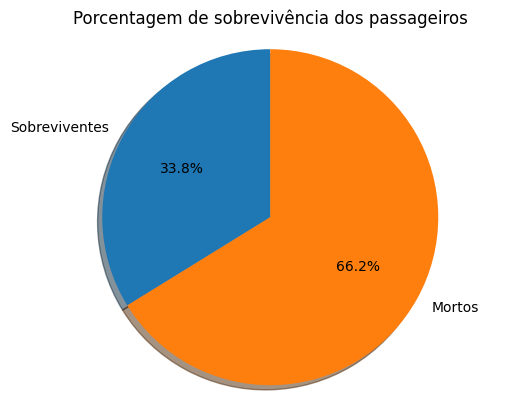

In [54]:
fig1,ax1 = plt.subplots()

sizes=[round(df_Solucao['Survived'].describe()[1],3),(1-round(df_Solucao['Survived'].describe()[1],3))]
labels= 'Sobreviventes', 'Mortos'

ax1.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.title('Porcentagem de sobrevivência dos passageiros')
plt.show()

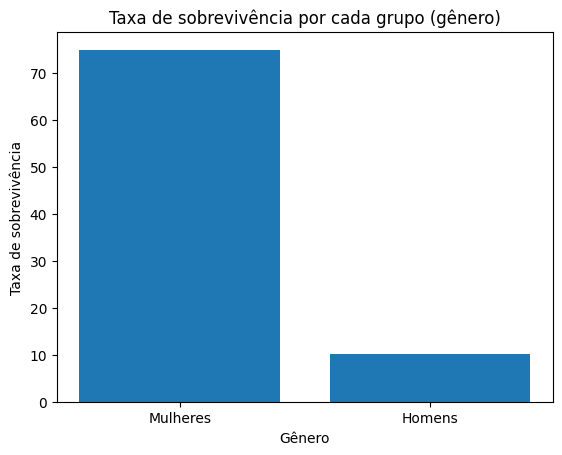

In [46]:
titulo = 'Mulheres', 'Homens'
fracao = [round(df_Solucao[teste_tratado['Sex']==0].describe()['Survived'][1],3)*100,round(df_Solucao[teste_tratado['Sex']==1].describe()['Survived'][1],3)*100]

plt.bar(titulo,fracao)
plt.xlabel('Gênero')
plt.ylabel('Taxa de sobrevivência')
plt.title('Taxa de sobrevivência por cada grupo (gênero)')
plt.show()

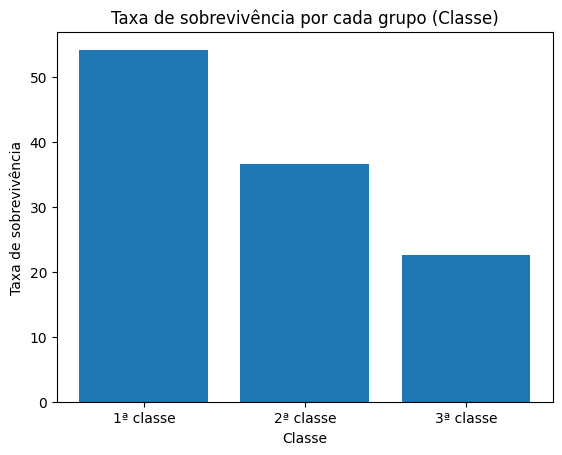

In [47]:
titulo = '1ª classe', '2ª classe', '3ª classe'

classe1=round(df_Solucao[teste_tratado['Pclass']==1].describe()['Survived'][1],3)*100
classe2=round(df_Solucao[teste_tratado['Pclass']==2].describe()['Survived'][1],3)*100
classe3=round(df_Solucao[teste_tratado['Pclass']==3].describe()['Survived'][1],3)*100
fracao = [classe1,classe2,classe3]


plt.bar(titulo,fracao)
plt.xlabel('Classe')
plt.ylabel('Taxa de sobrevivência')
plt.title('Taxa de sobrevivência por cada grupo (Classe)')
plt.show()